Access census catalog from mpc

# Parquet and GeoParquet
**Apache Parquet** or just Parquet is an open-source, column-oriented file format that makes it faster to retrieve data and uses less memory space for tabular fata, than CSV.

It is very popular for big data repositories

The geospatial version of parquet for storing vector data is called **GeoParquet**

This format comes from the neccessity to have an efficent and standarized format to store big geospatial data efficently. 

Introduced in Decemember 2022. 

# Catalog search

In [2]:
# import all neccesary libraries
import geopandas as gpd
import matplotlib.pyplot as plt

import pystac_client
import planetary_computer

import contextily as ctx # for adding basemaps

We use 2020 US Census Collection ID `us-census` to look for the data in the MPC catalog.

This collection has each tabular file as an item:

In [6]:
# open mpc catalog

catalog = pystac_client.Client.open(
 "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

# search for census collection

search = catalog.search(collections =['us-census'])

# retrieve items as a dictonary. list item id: then the item itself

items = {item.id : item for item in search.items()}

items

# convert to list

list(items)

# access counties

item = items['2020-cb_2020_us_county_500k']
item

id: 2020-cb_2020_us_county_500k
"bbox: [-179.148909, -14.548699, 179.77847, 71.365162]"
datetime: 2021-08-01T00:00:00Z
proj:epsg: 4269
"table:columns: [{'name': 'STATEFP', 'type': 'byte_array', 'description': 'State FIPS Code'}, {'name': 'COUNTYFP', 'type': 'byte_array', 'description': 'County FIPS code'}, {'name': 'COUNTYNS', 'type': 'byte_array'}, {'name': 'AFFGEOID', 'type': 'byte_array', 'description': 'American FactFinder summary level code + geovariant code + ""00US"" + GEOID'}, {'name': 'GEOID', 'type': 'byte_array', 'description': 'Concatenation of State FIPS and county FIPS code'}, {'name': 'NAME', 'type': 'byte_array', 'description': 'County name'}, {'name': 'NAMELSAD', 'type': 'byte_array', 'description': 'Name and Legal/statistical description'}, {'name': 'STUSPS', 'type': 'byte_array', 'description': 'FIPS State Postal Code'}, {'name': 'STATE_NAME', 'type': 'byte_array'}, {'name': 'LSAD', 'type': 'byte_array', 'description': 'Legal/statistical classification'}, {'name': 'ALAND', 'type': 'int64', 'description': 'Current land area'}, {'name': 'AWATER', 'type': 'int64', 'description': 'Current water area'}, {'name': 'geometry', 'type': 'byte_array', 'description': 'coordinates for County polygons'}]"
table:row_count: 3234
https://stac-extensions.github.io/table/v1.2.0/schema.json
https://stac-extensions.github.io/projection/v1.0.0/schema.json
href: abfs://us-census/2020/cb_2020_us_county_500k.parquet
type: application/x-parquet
title: Dataset root


Notice each item has a single asset `data`. This contains the URL to the GeoParquet file holding the information. Let's access the item's assets

In [8]:
# accessing item asset named data
asset = item.assets['data']

asset

# the href provided is what we want to open (GeoParquet)

href: abfs://us-census/2020/cb_2020_us_county_500k.parquet
type: application/x-parquet
title: Dataset root
roles: ['data']
owner: 2020-cb_2020_us_county_500k
"table:storage_options: {'account_name': 'ai4edataeuwest', 'credential': 'st=2023-12-03T21%3A28%3A55Z&se=2023-12-11T21%3A28%3A55Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2023-12-04T21%3A28%3A54Z&ske=2023-12-11T21%3A28%3A54Z&sks=b&skv=2021-06-08&sig=%2BkOITb2jNFUjnPQFt0M9VcuJS7trQOJqrTqf1Sl9kfw%3D'}"


`gpd.read_parquet()` function using the asset's URL pointing to the data:

In [12]:
counties = gpd.read_parquet(asset.href,
                            storage_options = asset.extra_fields['table:storage_options'])
counties

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,21,141,00516917,0500000US21141,21141,Logan,Logan County,KY,Kentucky,06,1430224002,12479211,"POLYGON ((-87.06037 36.68085, -87.06002 36.708..."
1,36,081,00974139,0500000US36081,36081,Queens,Queens County,NY,New York,06,281594050,188444349,"POLYGON ((-73.96262 40.73903, -73.96243 40.739..."
2,34,017,00882278,0500000US34017,34017,Hudson,Hudson County,NJ,New Jersey,06,119640822,41836491,"MULTIPOLYGON (((-74.04220 40.69997, -74.03900 ..."
3,34,019,00882228,0500000US34019,34019,Hunterdon,Hunterdon County,NJ,New Jersey,06,1108086284,24761598,"POLYGON ((-75.19511 40.57969, -75.19466 40.581..."
4,21,147,00516926,0500000US21147,21147,McCreary,McCreary County,KY,Kentucky,06,1105416696,10730402,"POLYGON ((-84.77845 36.60329, -84.73068 36.665..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,08,014,01945881,0500000US08014,08014,Broomfield,Broomfield County,CO,Colorado,06,85386686,1502572,"MULTIPOLYGON (((-105.10667 39.95783, -105.1073..."
3230,08,121,00198176,0500000US08121,08121,Washington,Washington County,CO,Colorado,06,6521806795,15207397,"POLYGON ((-103.70655 39.73989, -103.70655 39.7..."
3231,27,037,00659464,0500000US27037,27037,Dakota,Dakota County,MN,Minnesota,06,1456967786,62978183,"POLYGON ((-93.32967 44.77948, -93.32962 44.791..."
3232,31,161,00835902,0500000US31161,31161,Sheridan,Sheridan County,NE,Nebraska,06,6321862270,74723228,"POLYGON ((-102.79287 42.82249, -102.79211 42.9..."


In [14]:
type(counties)

geopandas.geodataframe.GeoDataFrame

## Contextily

Python library to add basemaps by retrieving tile maps from the internet and makes it possible to plot them alongside our vector data.

**Example**: Plot SB polygon together with basemap

In [17]:
sb = counties[counties.NAME == 'Santa Barbara']
sb

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
1222,06,083,00277306,0500000US06083,06083,Santa Barbara,Santa Barbara County,CA,California,06,7080860393,2729213352,"MULTIPOLYGON (((-119.04704 33.48382, -119.0384..."


<Axes: >

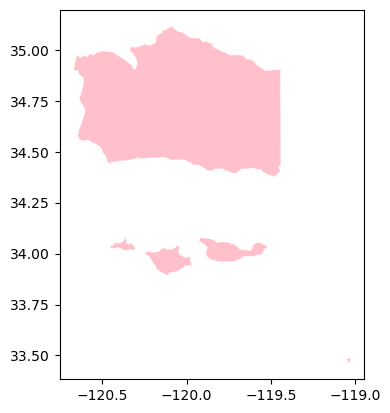

In [21]:
sb.plot(color = 'pink')

Contextily's tiles can be reprojected to match the crs of our vector data. But it can be easier to reproject our data to EPSG:3857 instead.

This is a projected CRS used for rendering maps online. Example: Google Maps and OpenStreet maps.


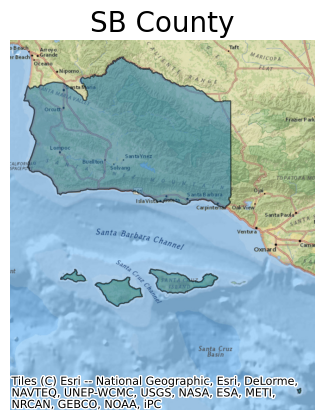

In [24]:
fig, ax = plt.subplots()

(sb.to_crs(epsg=3857)
 .plot(ax = ax, figsize = (5,5), alpha = 0.5, edgecolor = 'k')
)

# add basemap
ctx.add_basemap(ax, source = ctx.providers.Esri.NatGeoWorldMap)

ax.set_title('SB County', fontdict = {'fontsize':'20'})
ax.set_axis_off()